In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from core.data import load_from_kaggle


c:\Users\Admin\Git\loan-default-prediction\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_link = "yasserh/loan-default-dataset" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw\loan-default-dataset' already exists with files. Skipping download (replace=False).


In [3]:
files

['Loan_Default.csv']

In [4]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.00,not_neg,not_int,not_lpsm,"118,000.00",sb,pr,home,1U,"1,740.00",EXP,758,CIB,25-34,to_inst,98.73,south,direct,1,45.00
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.00,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,"4,980.00",EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.20,595.00,360.00,neg_amm,not_int,not_lpsm,"508,000.00",sb,pr,home,1U,"9,480.00",EXP,834,CIB,35-44,to_inst,80.02,south,direct,0,46.00
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.68,NaN,360.00,not_neg,not_int,not_lpsm,"658,000.00",sb,pr,home,1U,"11,880.00",EXP,587,CIB,45-54,not_inst,69.38,North,direct,0,42.00
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.30,0.00,360.00,not_neg,not_int,not_lpsm,"758,000.00",sb,pr,home,1U,"10,440.00",CRIF,602,EXP,25-34,not_inst,91.89,North,direct,0,39.00


In [6]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2).T,
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(148670, 34)

'Description'

,count,mean,std,min,25%,50%,75%,max
ID,"148,670.00","99,224.50","42,917.48","24,890.00","62,057.25","99,224.50","136,391.75","173,559.00"
year,"148,670.00","2,019.00",0.00,"2,019.00","2,019.00","2,019.00","2,019.00","2,019.00"
loan_amount,"148,670.00","331,117.74","183,909.31","16,500.00","196,500.00","296,500.00","436,500.00","3,576,500.00"
rate_of_interest,"112,231.00",4.05,0.56,0.00,3.62,3.99,4.38,8.00
Interest_rate_spread,"112,031.00",0.44,0.51,-3.64,0.08,0.39,0.78,3.36
Upfront_charges,"109,028.00","3,225.00","3,251.12",0.00,581.49,"2,596.45","4,812.50","60,000.00"
term,"148,629.00",335.14,58.41,96.00,360.00,360.00,360.00,360.00
property_value,"133,572.00","497,893.47","359,935.32","8,000.00","268,000.00","418,000.00","628,000.00","16,508,000.00"
income,"139,520.00","6,957.34","6,496.59",0.00,"3,720.00","5,760.00","8,520.00","578,580.00"
Credit_Score,"148,670.00",699.79,115.88,500.00,599.00,699.00,800.00,900.00


'Duplicates'

np.int64(0)

,Data Types,Missing Values,Unique Values,Sample Values
ID,int64,0,148670,"[72146, 98193, 27580]"
year,int64,0,1,"[2019, 2019, 2019]"
loan_limit,object,3344,2,"[cf, cf, cf]"
Gender,object,0,4,"[Female, Male, Joint]"
approv_in_adv,object,908,2,"[pre, nopre, nopre]"
loan_type,object,0,3,"[type1, type1, type1]"
loan_purpose,object,134,4,"[p3, p1, p4]"
Credit_Worthiness,object,0,2,"[l1, l1, l1]"
open_credit,object,0,2,"[nopc, nopc, nopc]"
business_or_commercial,object,0,2,"[b/c, nob/c, nob/c]"


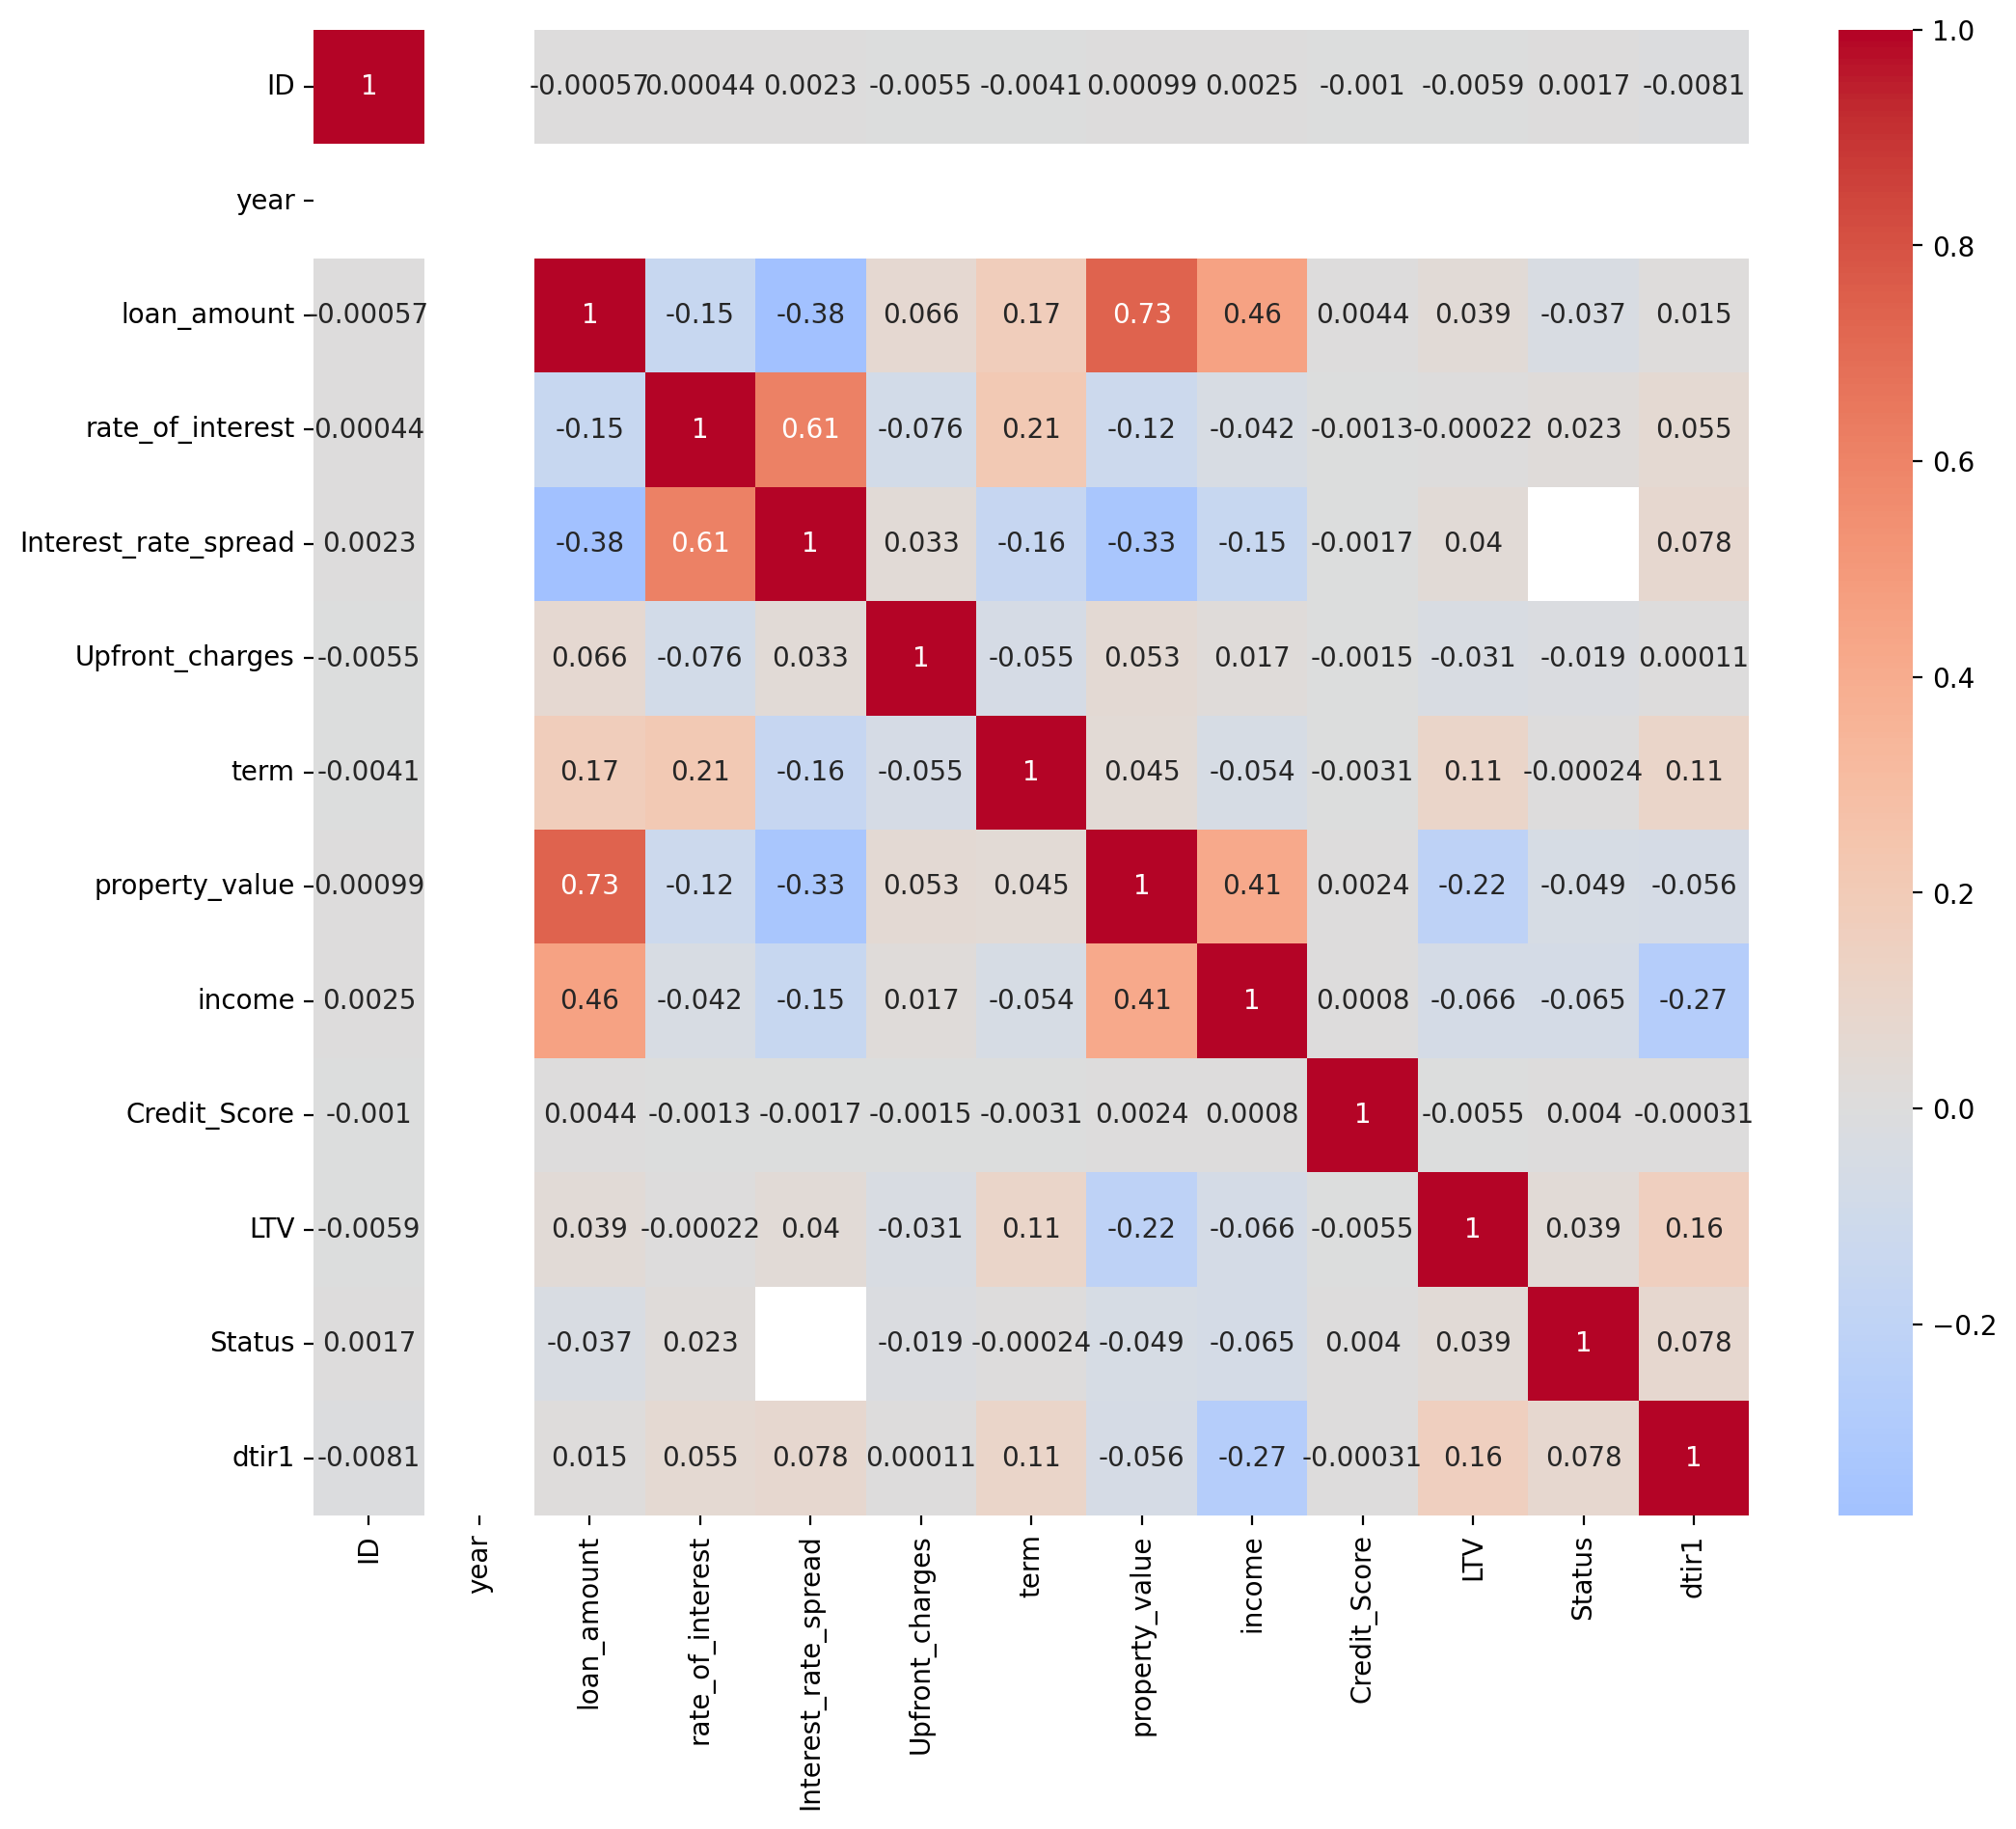

In [7]:
fig, ax = plt.subplots(figsize=(12, 10), dpi=200)

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax);

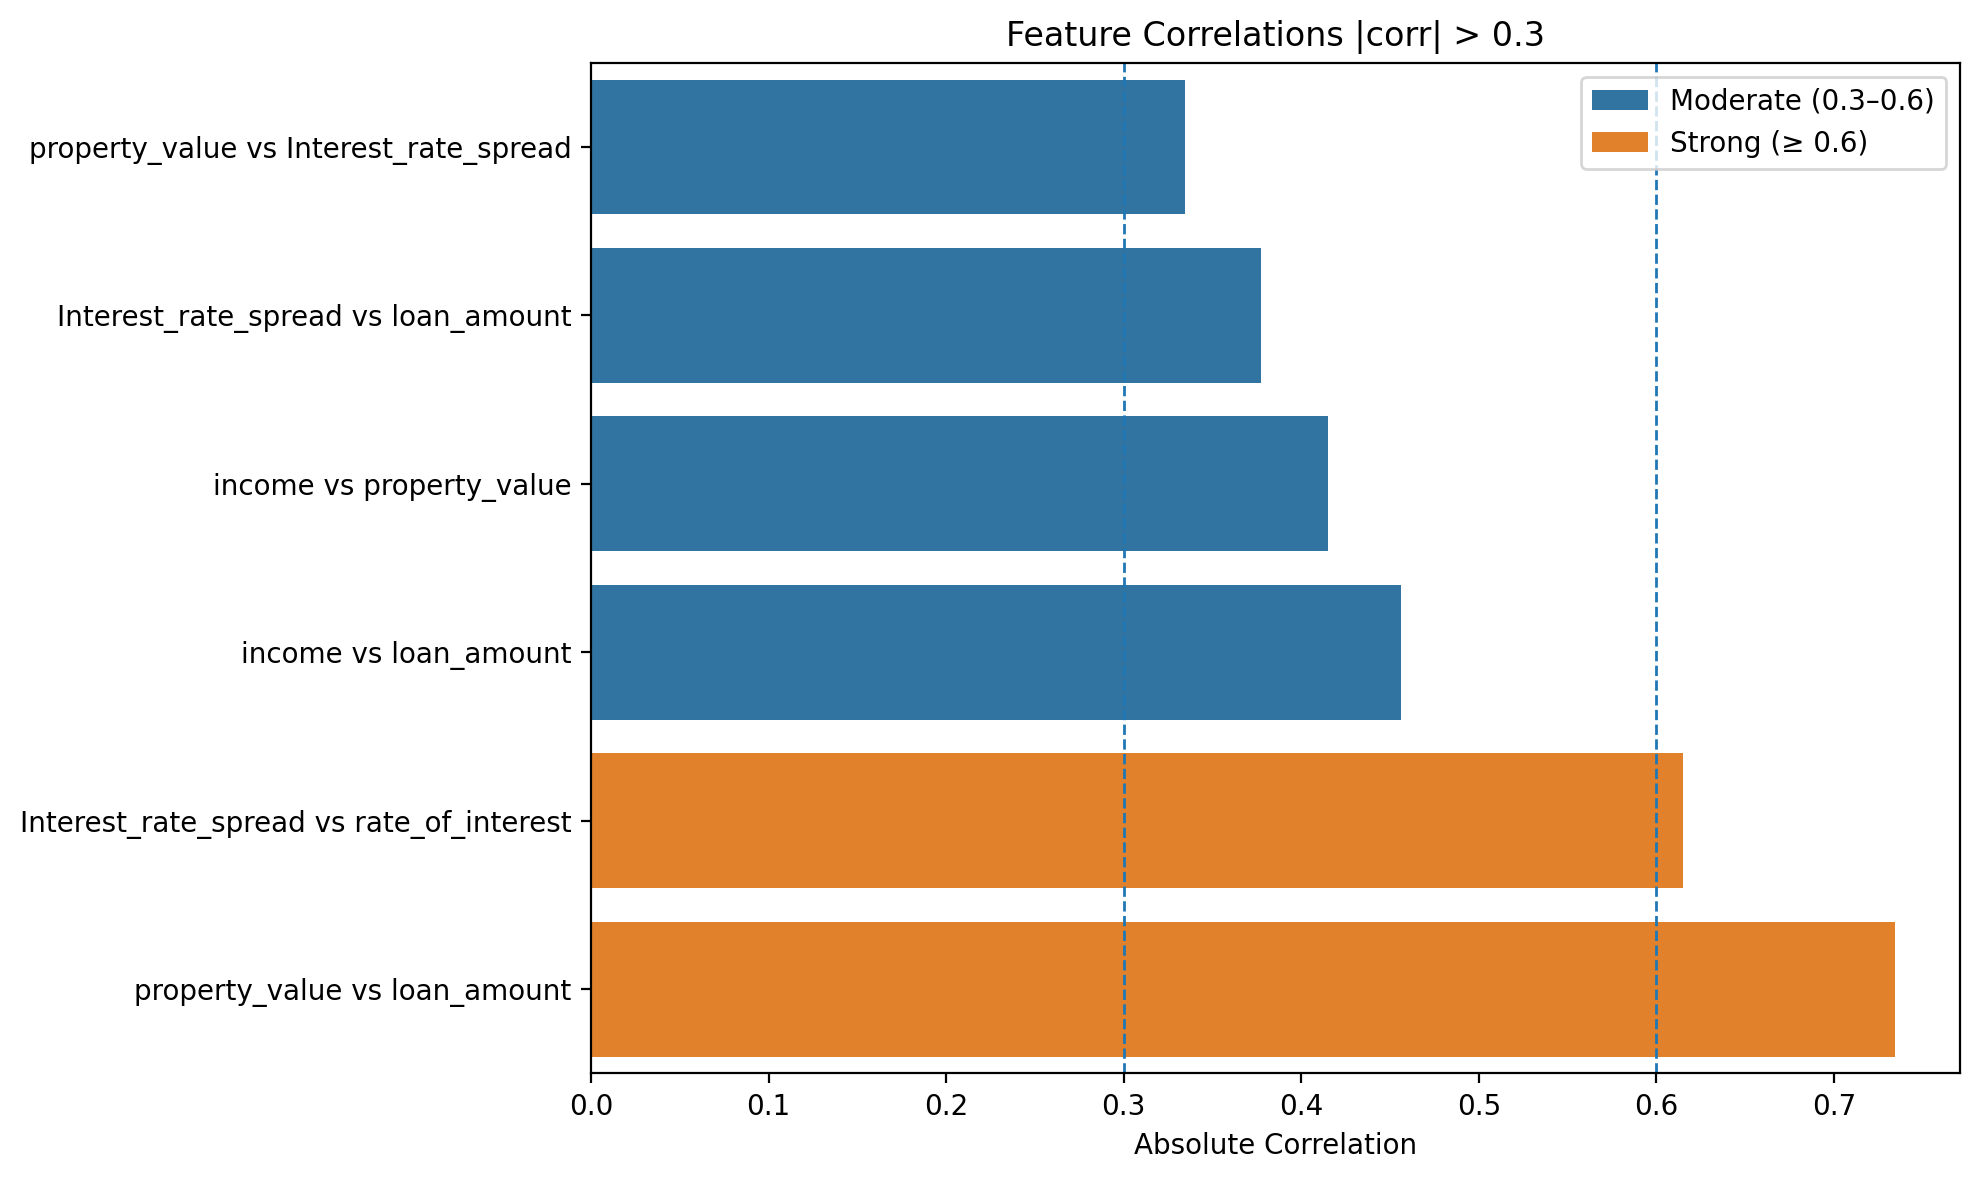

In [8]:
import numpy as np


# Correlation matrix
corr = df.corr(numeric_only=True)

# Remove duplicate pairs & self-correlation
mask = np.triu(np.ones_like(corr, dtype=bool))
corr = corr.where(~mask)

# Flatten
corr_long = corr.stack().reset_index()
corr_long.columns = ['feature_1', 'feature_2', 'correlation']

# Absolute correlation & filter
corr_long['abs_corr'] = corr_long['correlation'].abs()
corr_long = corr_long[corr_long['abs_corr'] > 0.3]

# Categorize correlation strength
corr_long['strength'] = np.where(
    corr_long['abs_corr'] >= 0.6,
    'Strong (≥ 0.6)',
    'Moderate (0.3–0.6)'
)

# Sort for nicer plot
corr_long = corr_long.sort_values('abs_corr', ascending=True)

# Bar plot
plt.figure(figsize=(10, 6), dpi=200)
sns.barplot(
    data=corr_long,
    x='abs_corr',
    y=corr_long['feature_1'] + ' vs ' + corr_long['feature_2'],
    hue='strength'
)

# Threshold lines
plt.axvline(0.3, linestyle='--', linewidth=1)
plt.axvline(0.6, linestyle='--', linewidth=1)

# Labels & title
plt.xlabel('Absolute Correlation')
plt.ylabel('')
plt.title('Feature Correlations |corr| > 0.3')
plt.legend(title='')
plt.tight_layout()
plt.show()

In [9]:
def numplots(col, data=df, key='Infected'):
    '''
    Plot a boxplot, histogram and KDE plot
    for a numeric column grouped by target.

    col: numeric column to plot
    data: DataFrame
    key: target column (default: 'Infected')
    '''
    fig, ax = plt.subplots(ncols=3, figsize=(16, 3))

    # Boxplot
    sns.boxplot(data=data, y=col, x=key, ax=ax[0])
    ax[0].set_title(f'{col} vs {key}')

    # Histogram
    data.groupby(key)[col].plot(
        kind='hist',
        bins=20,
        ax=ax[1],
        alpha=0.5,
        density=True
    )
    ax[1].set_title(f'{col} – Histogram')
    ax[1].legend(title=key)

    # KDE
    data.groupby(key)[col].plot(
        kind='kde',
        ax=ax[2]
    )
    ax[2].set_title(f'{col} – KDE')
    ax[2].legend(title=key)

    plt.tight_layout()
    plt.show()


In [10]:
nums = list(df.select_dtypes(include="number").columns)

In [11]:
def numplots(col, data=df, key='Status', min_per_class=10):
    # Drop NaNs
    plot_data = data[[col, key]].dropna()

    # Check class counts
    counts = plot_data.groupby(key)[col].count()
    if (counts < min_per_class).any():
        print(f"Skipping {col}: insufficient data per class")
        return

    fig, ax = plt.subplots(ncols=3, figsize=(16, 3))

    # Boxplot
    sns.boxplot(data=plot_data, x=key, y=col, ax=ax[0])
    ax[0].set_title(f'{col} vs Status')

    # Histogram
    sns.histplot(
        data=plot_data,
        x=col,
        hue=key,
        bins=20,
        stat='density',
        common_norm=False,
        alpha=0.5,
        ax=ax[1]
    )
    ax[1].set_title('Histogram')

    # KDE
    sns.kdeplot(
        data=plot_data,
        x=col,
        hue=key,
        common_norm=False,
        ax=ax[2]
    )
    ax[2].set_title('KDE')

    plt.tight_layout()
    plt.show()


In [12]:
nums = df.select_dtypes(include='number').columns.tolist()
nums = [c for c in nums if c not in ['ID', 'year', 'Status']]


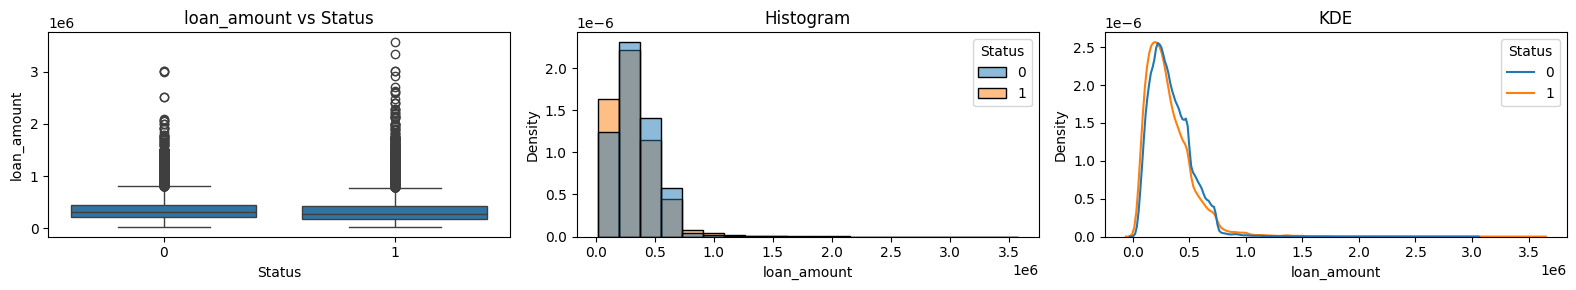

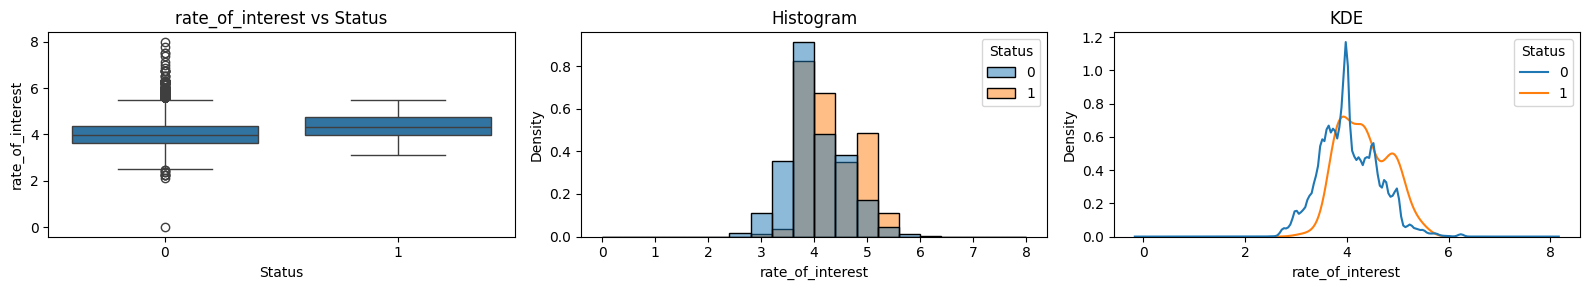

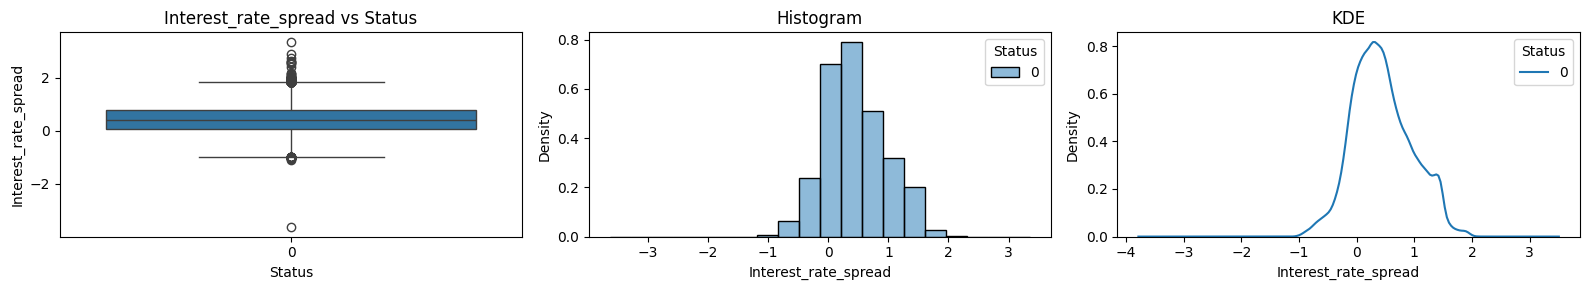

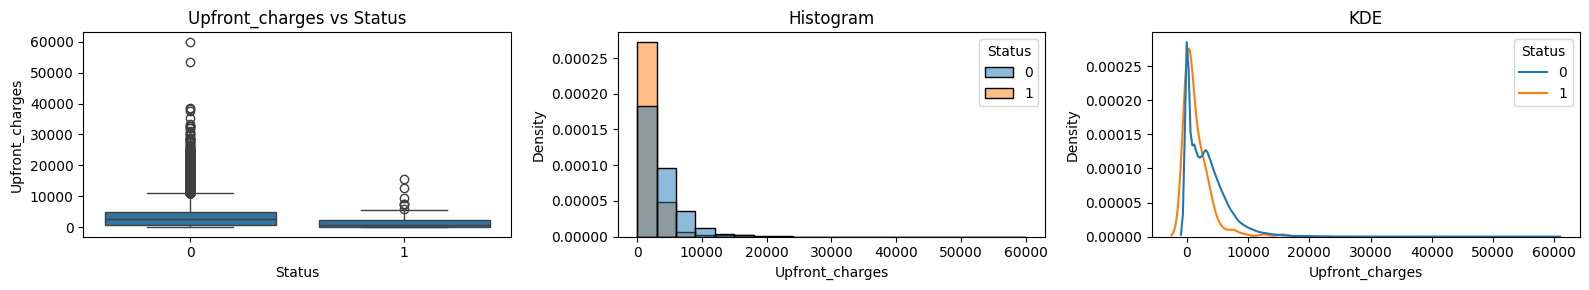

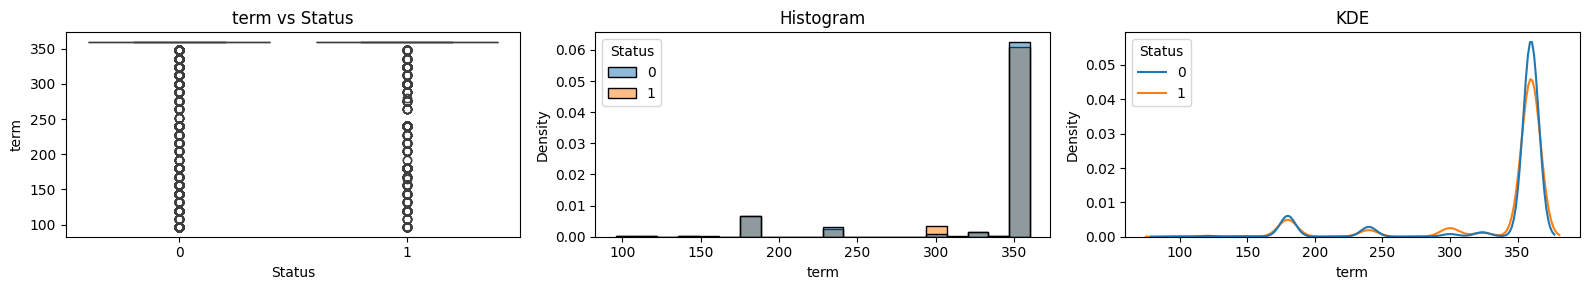

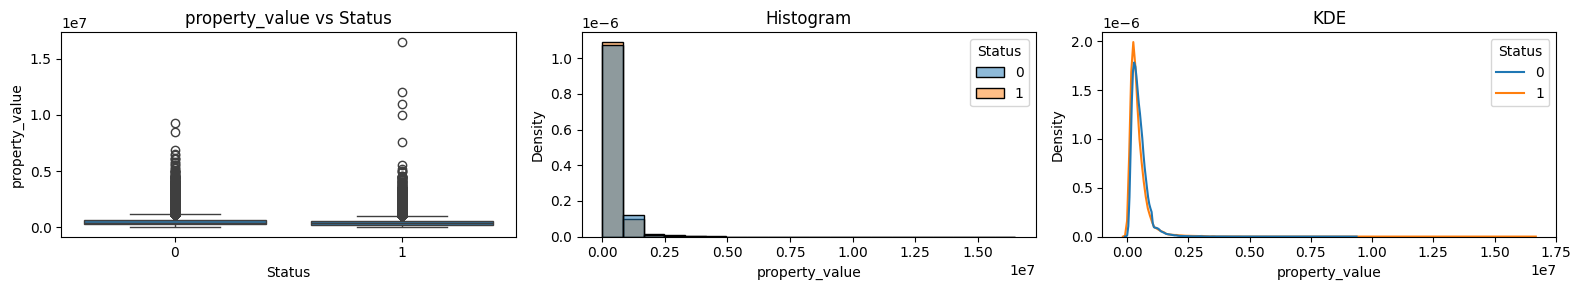

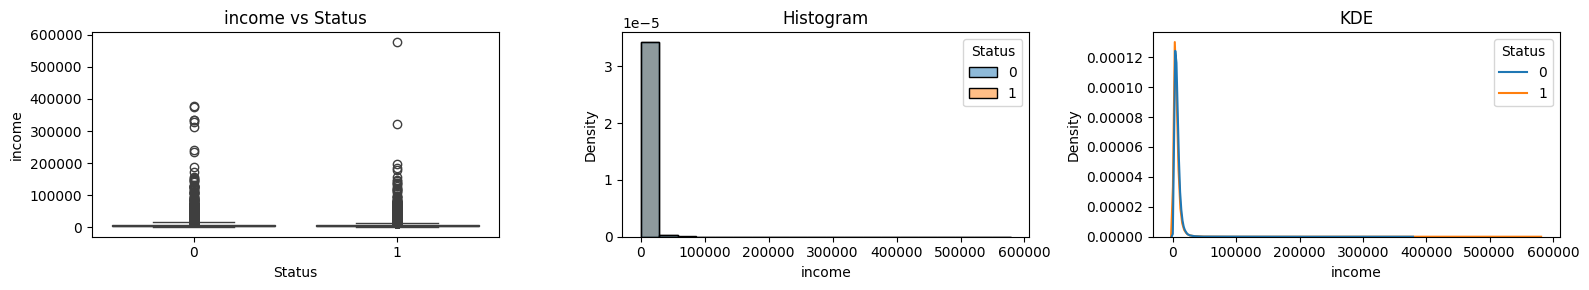

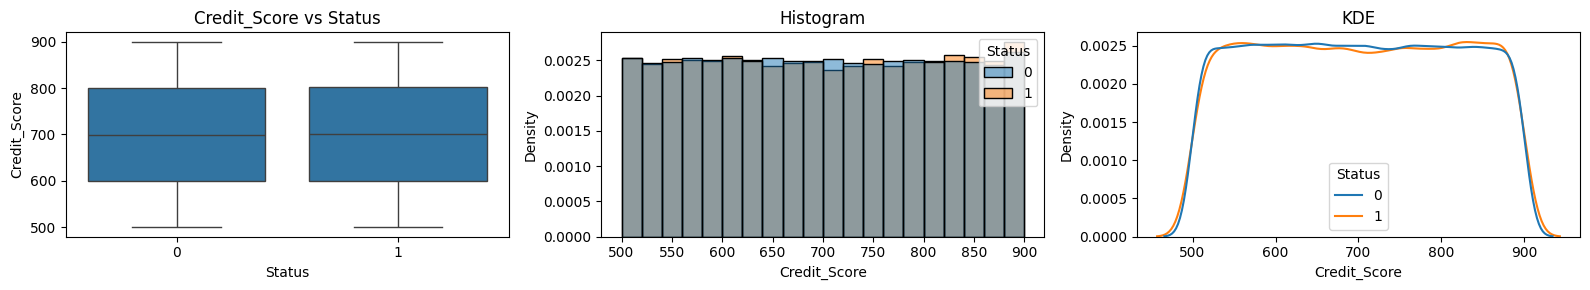

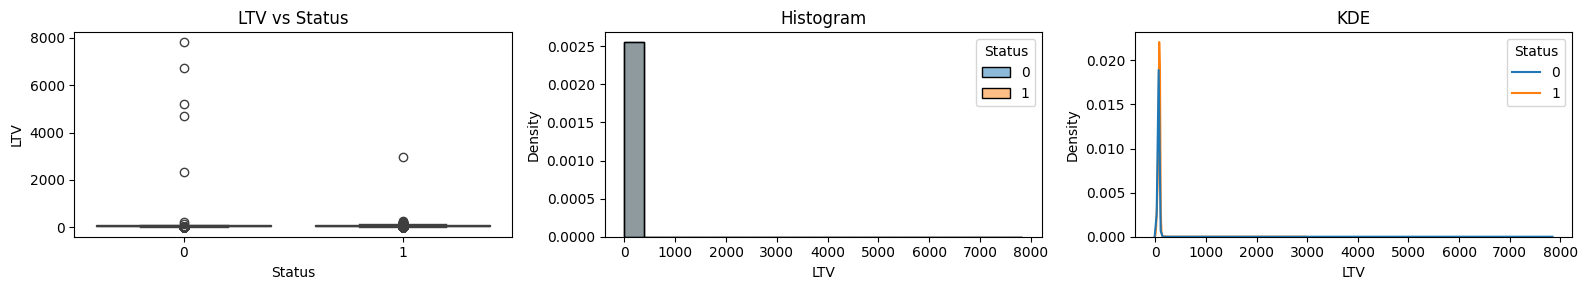

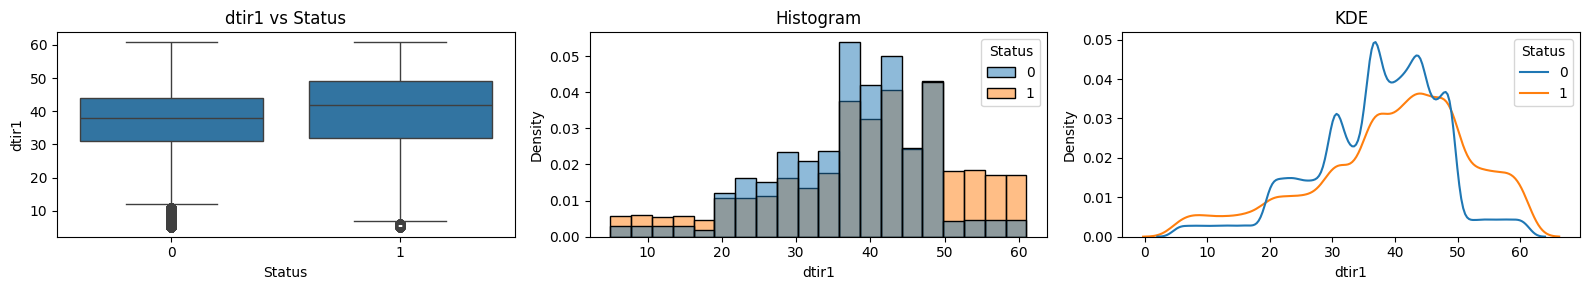

In [13]:
for num in nums:
    numplots(num)


In [14]:
def catplot(col, data=df, key='Status', min_count=50):
    # Absolute counts
    ct_abs = pd.crosstab(data[col], data[key])

    # Drop rare categories
    ct_abs = ct_abs[ct_abs.sum(axis=1) >= min_count]

    # Relative distribution
    ct_rel = ct_abs.div(ct_abs.sum(axis=1), axis=0)

    fig, ax = plt.subplots(1, 2, figsize=(14, 3))

    # Relative
    ct_rel[1].plot(kind='bar', ax=ax[0])
    ax[0].axhline(data[key].mean(), linestyle='--', color='red')
    ax[0].set_title(f'Default Rate by {col}')
    ax[0].set_ylabel('Rate')

    # Absolute
    ct_abs.plot(kind='bar', ax=ax[1])
    ax[1].set_title(f'Counts by {col}')

    plt.tight_layout()
    plt.show()


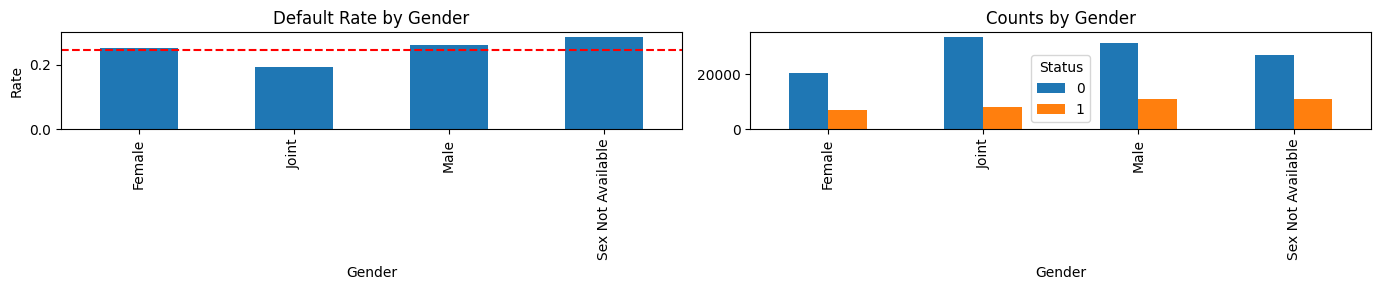

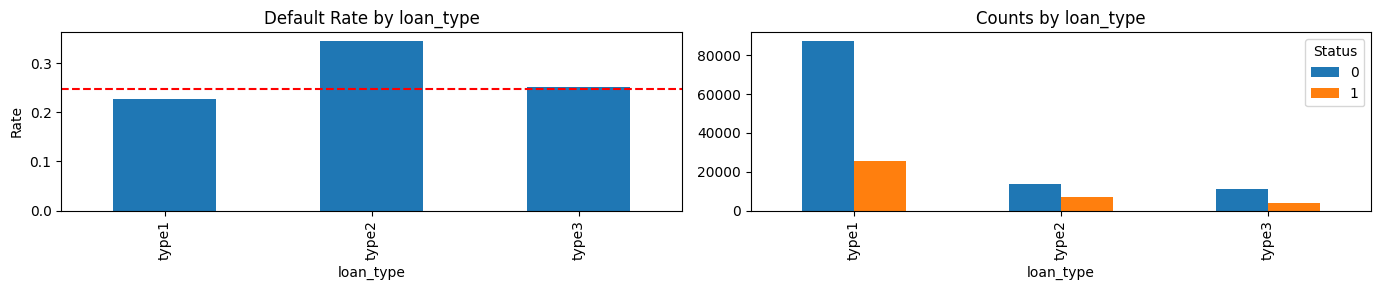

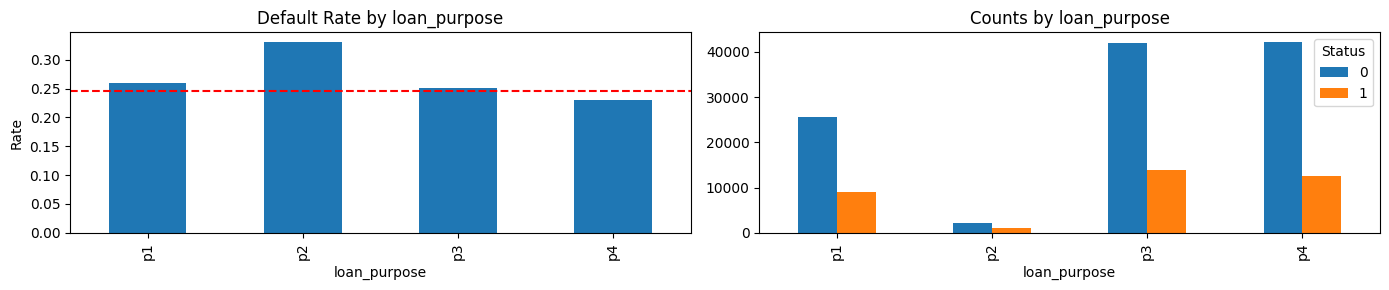

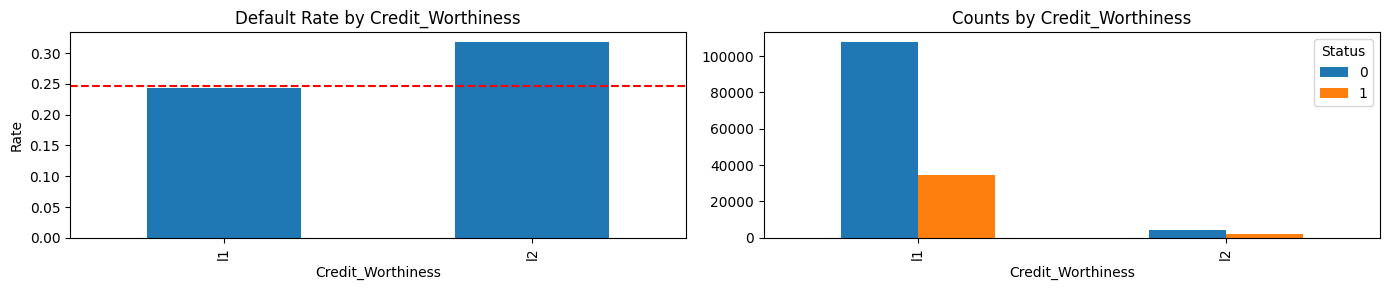

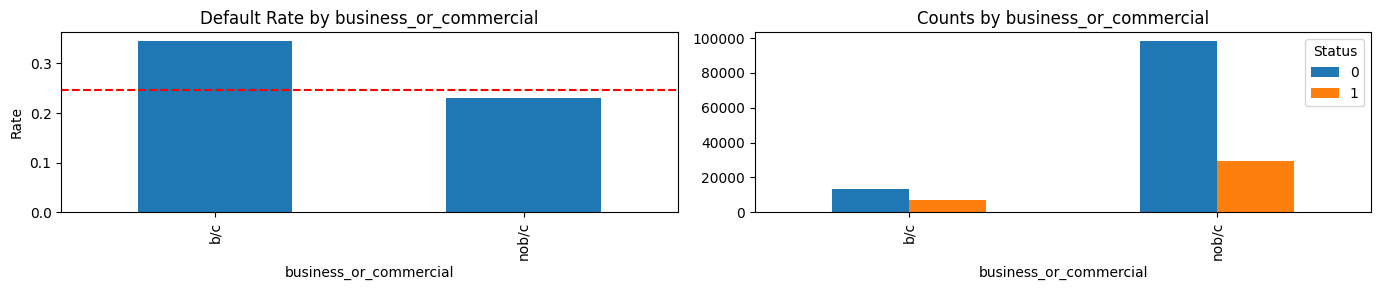

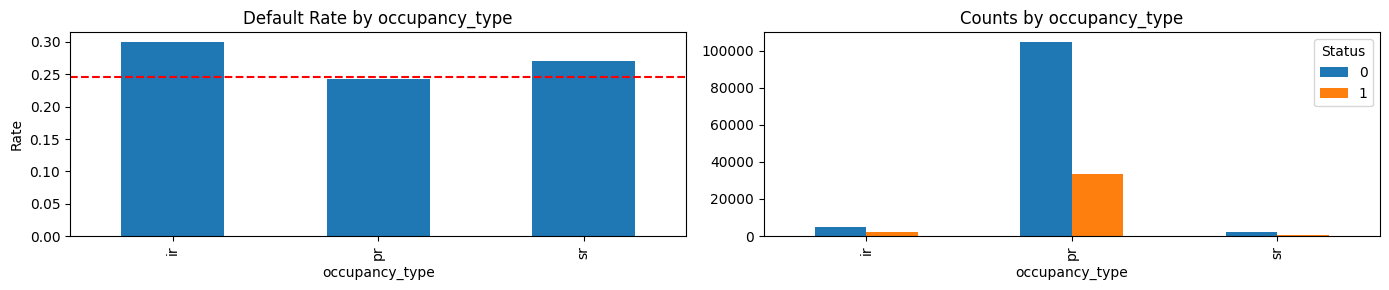

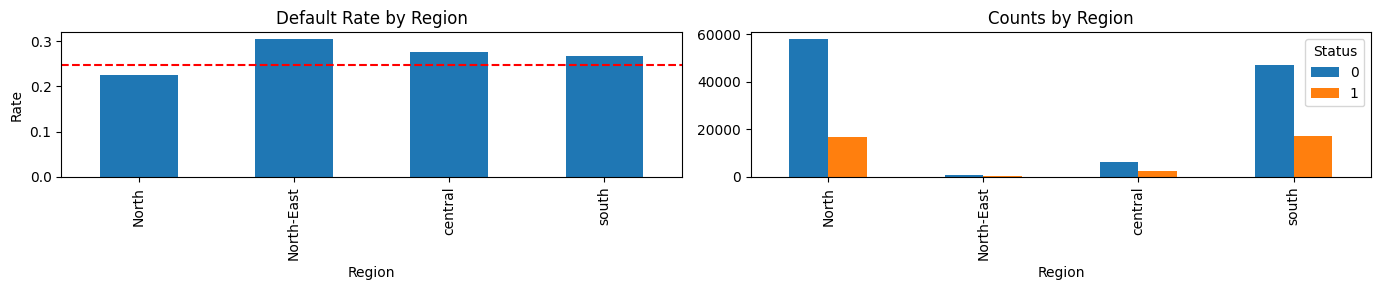

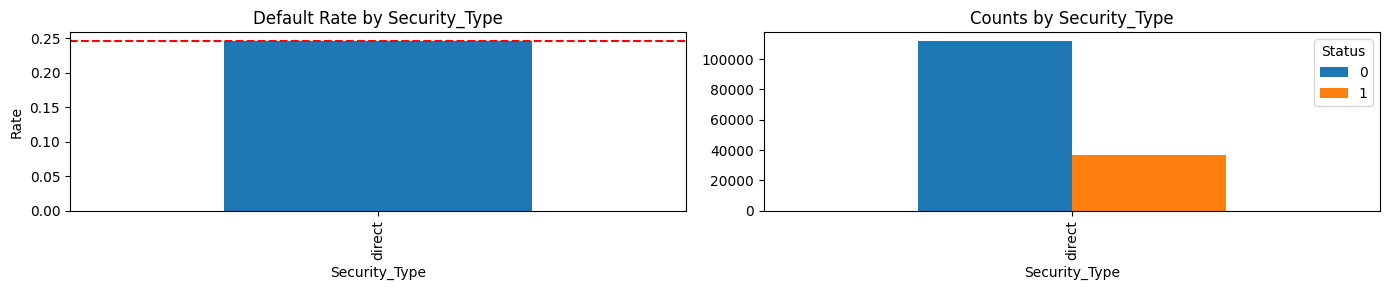

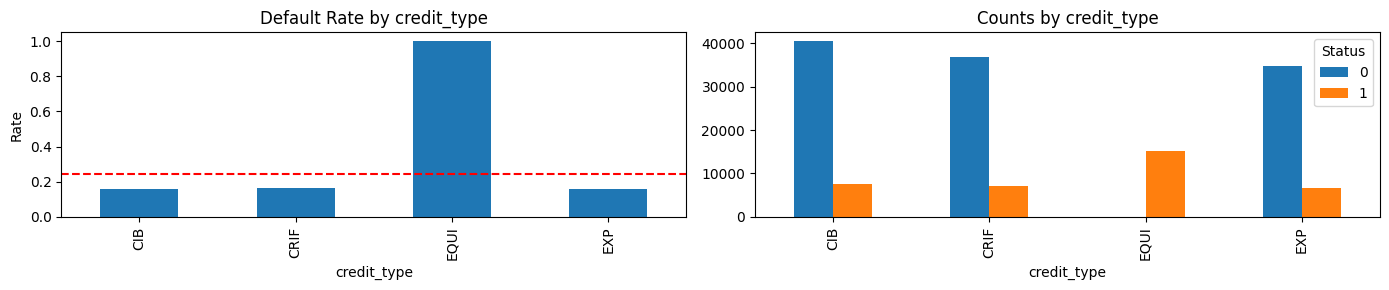

In [15]:
cats = [
    'Gender',
    'loan_type',
    'loan_purpose',
    'Credit_Worthiness',
    'business_or_commercial',
    'occupancy_type',
    'Region',
    'Security_Type',
    'credit_type'
]

for cat in cats:
    catplot(cat)


In [16]:
spread_status_pct = (
    df.loc[df['Interest_rate_spread'].notna(), 'Status']
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
)

spread_status_pct


Status
0   100.00
Name: proportion, dtype: float64

In [17]:
pd.crosstab(
    df['Status'],
    df['Interest_rate_spread'].isna(),
    normalize='index'
).mul(100).round(2)


Interest_rate_spread,False,True
Status,,
0,100.00,0.00
1,0.00,100.00


In [32]:
ct_abs = pd.crosstab(df['Security_Type'], df['Status'])
ct_pct = pd.crosstab(
    df['Security_Type'],
    df['Status'],
    normalize='index'
).mul(100).round(2)

ct_combined = ct_abs.copy()

ct_combined.columns = ['Status_0_count', 'Status_1_count']
ct_combined['Status_0_%'] = ct_pct[0]
ct_combined['Status_1_%'] = ct_pct[1]

ct_combined


,Status_0_count,Status_1_count,Status_0_%,Status_1_%
Security_Type,,,,
Indriect,0,33,0.00,100.00
direct,112031,36606,75.37,24.63


In [19]:
def overview(df):
    display(pd.DataFrame({
        "dtype": df.dtypes,
        "total": df.count(),
        "missing_n": df.isna().sum(),
        "missing_%": df.isna().mean() * 100,
        "uniques_n": df.nunique(),
        "uniques": [df[col].unique() for col in df.columns]
    }))


In [20]:
overview(df)

,dtype,total,missing_n,missing_%,uniques_n,uniques
ID,int64,148670,0,0.00,148670,"[24890, 24891, 24892, 24893, 24894, 24895, 248..."
year,int64,148670,0,0.00,1,[2019]
loan_limit,object,145326,3344,2.25,2,"[cf, nan, ncf]"
Gender,object,148670,0,0.00,4,"[Sex Not Available, Male, Joint, Female]"
approv_in_adv,object,147762,908,0.61,2,"[nopre, pre, nan]"
loan_type,object,148670,0,0.00,3,"[type1, type2, type3]"
loan_purpose,object,148536,134,0.09,4,"[p1, p4, p3, p2, nan]"
Credit_Worthiness,object,148670,0,0.00,2,"[l1, l2]"
open_credit,object,148670,0,0.00,2,"[nopc, opc]"
business_or_commercial,object,148670,0,0.00,2,"[nob/c, b/c]"


In [21]:
status_abs = df['Status'].value_counts().sort_index()
status_rel = df['Status'].value_counts(normalize=True).sort_index() * 100

In [22]:
pd.DataFrame({
    'count': status_abs,
    'percentage': status_rel.round(2)
})


,count,percentage
Status,,
0,112031,75.36
1,36639,24.64


In [23]:
missing_vs_status = []

for col in df.columns:
    if df[col].isna().any() and col != 'Status':
        ct = pd.crosstab(
            df['Status'],
            df[col].isna(),
            normalize='index'
        )
        if True in ct.columns:
            missing_vs_status.append({
                'feature': col,
                'Status_0_missing_%': ct.loc[0, True] * 100,
                'Status_1_missing_%': ct.loc[1, True] * 100
            })

missing_vs_status_df = (
    pd.DataFrame(missing_vs_status)
    .sort_values('Status_1_missing_%', ascending=False)
    .round(2)
)

missing_vs_status_df


,feature,Status_0_missing_%,Status_1_missing_%
4,Interest_rate_spread,0.00,100.00
5,Upfront_charges,2.82,99.58
3,rate_of_interest,0.00,99.45
13,dtir1,6.97,44.52
8,property_value,0.00,41.20
12,LTV,0.00,41.20
9,income,7.06,3.38
0,loan_limit,2.20,2.40
1,approv_in_adv,0.60,0.66
11,submission_of_application,0.00,0.55


In [24]:
strong_missing = [
    'Interest_rate_spread',
    'rate_of_interest',
    'Upfront_charges',
    'dtir1',
    'property_value',
    'LTV'
]


In [25]:
for col in strong_missing:
    df[f'{col}_missing'] = df[col].isna().astype(int)


In [26]:
df[[f'{col}_missing' for col in strong_missing]].sum()


Interest_rate_spread_missing    36639
rate_of_interest_missing        36439
Upfront_charges_missing         39642
dtir1_missing                   24121
property_value_missing          15098
LTV_missing                     15098
dtype: int64

In [27]:
missing_flag_summary = []

for col in strong_missing:
    ct = pd.crosstab(
        df[f'{col}_missing'],
        df['Status'],
        normalize='index'
    )
    missing_flag_summary.append({
        'feature': f'{col}_missing',
        'Status_0_when_present_%': ct.loc[0, 0] * 100,
        'Status_1_when_present_%': ct.loc[0, 1] * 100,
        'Status_0_when_missing_%': ct.loc[1, 0] * 100,
        'Status_1_when_missing_%': ct.loc[1, 1] * 100
    })

missing_flag_summary_df = (
    pd.DataFrame(missing_flag_summary)
    .round(2)
)

missing_flag_summary_df


,feature,Status_0_when_present_%,Status_1_when_present_%,Status_0_when_missing_%,Status_1_when_missing_%
0,Interest_rate_spread_missing,100.00,0.00,0.00,100.00
1,rate_of_interest_missing,99.82,0.18,0.00,100.00
2,Upfront_charges_missing,99.86,0.14,7.96,92.04
3,dtir1_missing,83.68,16.32,32.38,67.62
4,property_value_missing,83.87,16.13,0.01,99.99
5,LTV_missing,83.87,16.13,0.01,99.99


In [34]:
cat_cols = df.select_dtypes(include='object').columns.tolist()

In [35]:
def categorical_distribution(df, col):
    counts = df[col].value_counts(dropna=False)
    perc = counts / counts.sum() * 100
    cum_perc = perc.cumsum()

    result = pd.DataFrame({
        'count': counts,
        'percentage': perc.round(2),
        'cumulative_percentage': cum_perc.round(2)
    })

    return result


In [36]:
for col in cat_cols:
    print(f'\n=== {col} ===')
    display(categorical_distribution(df, col))
    print(f'Unique values: {df[col].nunique(dropna=False)}')



=== loan_limit ===


,count,percentage,cumulative_percentage
loan_limit,,,
cf,135348,91.04,91.04
ncf,9978,6.71,97.75
NaN,3344,2.25,100.00


Unique values: 3

=== Gender ===


,count,percentage,cumulative_percentage
Gender,,,
Male,42346,28.48,28.48
Joint,41399,27.85,56.33
Sex Not Available,37659,25.33,81.66
Female,27266,18.34,100.00


Unique values: 4

=== approv_in_adv ===


,count,percentage,cumulative_percentage
approv_in_adv,,,
nopre,124621,83.82,83.82
pre,23141,15.57,99.39
NaN,908,0.61,100.00


Unique values: 3

=== loan_type ===


,count,percentage,cumulative_percentage
loan_type,,,
type1,113173,76.12,76.12
type2,20762,13.97,90.09
type3,14735,9.91,100.00


Unique values: 3

=== loan_purpose ===


,count,percentage,cumulative_percentage
loan_purpose,,,
p3,55934,37.62,37.62
p4,54799,36.86,74.48
p1,34529,23.23,97.71
p2,3274,2.20,99.91
NaN,134,0.09,100.00


Unique values: 5

=== Credit_Worthiness ===


,count,percentage,cumulative_percentage
Credit_Worthiness,,,
l1,142344,95.74,95.74
l2,6326,4.26,100.00


Unique values: 2

=== open_credit ===


,count,percentage,cumulative_percentage
open_credit,,,
nopc,148114,99.63,99.63
opc,556,0.37,100.00


Unique values: 2

=== business_or_commercial ===


,count,percentage,cumulative_percentage
business_or_commercial,,,
nob/c,127908,86.03,86.03
b/c,20762,13.97,100.00


Unique values: 2

=== Neg_ammortization ===


,count,percentage,cumulative_percentage
Neg_ammortization,,,
not_neg,133420,89.74,89.74
neg_amm,15129,10.18,99.92
NaN,121,0.08,100.00


Unique values: 3

=== interest_only ===


,count,percentage,cumulative_percentage
interest_only,,,
not_int,141560,95.22,95.22
int_only,7110,4.78,100.00


Unique values: 2

=== lump_sum_payment ===


,count,percentage,cumulative_percentage
lump_sum_payment,,,
not_lpsm,145286,97.72,97.72
lpsm,3384,2.28,100.00


Unique values: 2

=== construction_type ===


,count,percentage,cumulative_percentage
construction_type,,,
sb,148637,99.98,99.98
mh,33,0.02,100.00


Unique values: 2

=== occupancy_type ===


,count,percentage,cumulative_percentage
occupancy_type,,,
pr,138201,92.96,92.96
ir,7340,4.94,97.90
sr,3129,2.10,100.00


Unique values: 3

=== Secured_by ===


,count,percentage,cumulative_percentage
Secured_by,,,
home,148637,99.98,99.98
land,33,0.02,100.00


Unique values: 2

=== total_units ===


,count,percentage,cumulative_percentage
total_units,,,
1U,146480,98.53,98.53
2U,1477,0.99,99.52
3U,393,0.26,99.78
4U,320,0.22,100.00


Unique values: 4

=== credit_type ===


,count,percentage,cumulative_percentage
credit_type,,,
CIB,48152,32.39,32.39
CRIF,43901,29.53,61.92
EXP,41319,27.79,89.71
EQUI,15298,10.29,100.00


Unique values: 4

=== co-applicant_credit_type ===


,count,percentage,cumulative_percentage
co-applicant_credit_type,,,
CIB,74392,50.04,50.04
EXP,74278,49.96,100.00


Unique values: 2

=== age ===


,count,percentage,cumulative_percentage
age,,,
45-54,34720,23.35,23.35
35-44,32818,22.07,45.43
55-64,32534,21.88,67.31
65-74,20744,13.95,81.26
25-34,19142,12.88,94.14
>74,7175,4.83,98.97
<25,1337,0.90,99.87
NaN,200,0.13,100.00


Unique values: 8

=== submission_of_application ===


,count,percentage,cumulative_percentage
submission_of_application,,,
to_inst,95814,64.45,64.45
not_inst,52656,35.42,99.87
NaN,200,0.13,100.00


Unique values: 3

=== Region ===


,count,percentage,cumulative_percentage
Region,,,
North,74722,50.26,50.26
south,64016,43.06,93.32
central,8697,5.85,99.17
North-East,1235,0.83,100.00


Unique values: 4

=== Security_Type ===


,count,percentage,cumulative_percentage
Security_Type,,,
direct,148637,99.98,99.98
Indriect,33,0.02,100.00


Unique values: 2
